# STOCK PRICE PREDICTION USING LINEAR REGRESSION

In [61]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv('BSE-SPBSS5IP.csv')
df.tail()
print(df.tail())


           Date      Open      High       Low     Close
415  2017-09-25  10380.50  10388.43  10215.60  10261.82
416  2017-09-22  10507.69  10508.40  10351.80  10361.97
417  2017-09-21  10544.30  10562.01  10460.29  10520.62
418  2017-09-20  10572.58  10579.76  10537.31  10542.20
419  2017-09-19  10585.14  10585.88  10535.06  10551.47


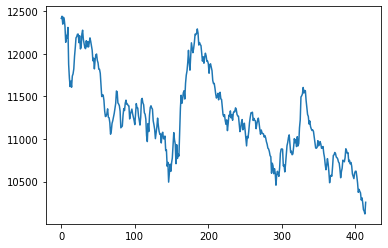

In [59]:
df['Close'].plot()
plt.show()

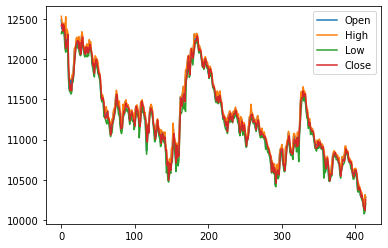

In [60]:
df[['Open','High','Low','Close']].plot()
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import math

In [56]:
forecast_col = 'Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

5
         Date      Open      High       Low     Close     label
0  2019-05-31  12490.45  12535.01  12319.14  12416.37  12323.52
1  2019-05-30  12374.53  12461.88  12351.00  12441.19  12134.84
2  2019-05-29  12425.06  12425.33  12325.32  12348.48  12216.30
3  2019-05-28  12436.58  12450.09  12359.85  12428.98  12183.78
4  2019-05-27  12351.43  12445.08  12294.42  12405.40  12309.84


In [57]:
#X = np.array(df.drop(['label'], 1))

X=np.array(df.drop(['Date','label'], axis=1))
X = preprocessing.scale(X)
#print(X)
X_lately = X[-forecast_out:]
#print(X_lately)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [65]:
X_train.shape
X_test.shape

(83, 4)

In [66]:
y_train.shape
y_test.shape

(83,)

In [67]:
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)
forecast_set = clf.predict(X_lately)
print(forecast_set)

0.8728359790967708
[10488.56660602 10581.97997378 10574.35790113 10538.30325464
 10560.4681943 ]
